In [2]:
import os
import re
from collections import defaultdict
import nltk
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_|score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from IPython.display import display, SVG


SyntaxError: invalid syntax (2348714504.py, line 10)

In [3]:
def load_docs(directory):
    docs = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
            cleaned_text = re.sub(r"[^a-zA-Z\s']", "", text)  # Remove non-alphabetic characters
            filtered_text = re.sub(r"\b[a-zA-Z']\b", "", cleaned_text)  # Remove single characters
            cleaned_text = re.sub(r"\n", " ", filtered_text)  # Replace new lines with space
            cleaned_text = re.sub(r"\s+", " ", cleaned_text)  # Replace multiple spaces with single space
            docs.append(cleaned_text)
    return docs

neg_dir = '../NLP/TEXT/txt_sentoken/neg/'
pos_dir = '../NLP/TEXT/txt_sentoken/pos/'

# Load negative and positive documents
neg_docs = load_docs(neg_dir)
pos_docs = load_docs(pos_dir)

NameError: name 'os' is not defined

In [4]:
print(len(neg_docs), len(pos_docs))

NameError: name 'neg_docs' is not defined

In [5]:
all_words = pos_docs + neg_docs
labels = [1] * len(pos_docs) + [0] * len(neg_docs)

NameError: name 'pos_docs' is not defined

In [6]:
# Split the data
train_x, test_x, train_y, test_y = train_test_split(all_words, labels, test_size=0.2, stratify=labels)

print(len(train_y),len(test_y))

NameError: name 'train_test_split' is not defined

In [7]:
train_x[0]

NameError: name 'train_x' is not defined

In [8]:
# Load the dataset from the CSV file
df = pd.read_csv('dataset.csv')

# Extract the text and labels
all_words = df['text'].tolist()
labels = df['label'].tolist()

# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(all_words, labels, test_size=0.2, stratify=labels)

NameError: name 'pd' is not defined

In [9]:
# Download NLTK tokenizer data
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [9]:
# Step 1: Tokenize the sentences using nltk
train_x_tokenized = [nltk.word_tokenize(sentence.lower()) for sentence in train_x]
test_x_tokenized = [nltk.word_tokenize(sentence.lower()) for sentence in test_x]

In [10]:
# Define the stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the tokenized sentences
train_x_filtered = [[word for word in sentence if word not in stop_words] for sentence in train_x_tokenized]
test_x_filtered = [[word for word in sentence if word not in stop_words] for sentence in test_x_tokenized]

NameError: name 'stopwords' is not defined

In [11]:
# Step 2: Build a simple vocabulary from the tokenized data
def build_vocab(tokenized_sentences, min_freq=1):
    word_freq = defaultdict(int)
    for sentence in tokenized_sentences:
        for word in sentence:
            word_freq[word] += 1
    
    # Only keep words that appear more than `min_freq` times
    vocab = {word: idx + 1 for idx, (word, freq) in enumerate(word_freq.items()) if freq >= min_freq}
    vocab["<PAD>"] = 0  # Padding token
    return vocab

# Combine training and test data to build the vocabulary
combined_data = train_x_filtered + test_x_filtered
vocab = build_vocab(combined_data)

In [12]:
print("hello" , vocab["hello"])
print("world", vocab["world"])

hello 7941
world 722


In [13]:
# Step 3: Convert the tokenized sentences to numerical format using the vocabulary
def tokenize(sentences, vocab):
    return [[vocab.get(word, vocab["<PAD>"]) for word in sentence] for sentence in sentences]

train_x_filtered_indices = tokenize(train_x_filtered, vocab)
test_x_filtered_indices = tokenize(test_x_filtered, vocab)

In [14]:
# Numeric form of first sentence:
train_x_filtered_indices[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 11,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 12,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 12,
 41,
 42,
 7,
 43,
 42,
 44,
 11,
 19,
 45,
 46,
 4,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 4,
 56,
 57,
 58,
 59,
 60,
 55,
 61,
 62,
 63,
 64,
 65,
 66,
 4,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 4,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 21,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 12,
 96,
 97,
 98,
 94,
 99,
 100,
 101,
 92,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 4,
 110,
 111,
 112,
 113,
 114,
 4,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 121,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 152,
 156,
 157,
 150,
 149,
 158,
 159,
 25,
 160,
 121,
 161,
 162,
 163,
 164,
 34,
 

Many machine learning models, especially neural networks, require inputs of a fixed size. This uniformity simplifies the architecture and ensures that the model can process each input consistently. Having fixed-length sentences is important for several reasons when vectorizing text data for machine learning:

1. **Batch Processing**: Fixed-length sentences allow for efficient batch processing. When training models, it's common to process multiple samples simultaneously (in batches). Having inputs of the same length makes it easier to stack them into a single tensor, which can be processed in parallel.

2. **Memory Management**: Fixed-length inputs help in managing memory more effectively. Variable-length inputs would require dynamic memory allocation, which can be inefficient and slow.

3. **Padding and Truncation**: To achieve fixed-length sentences, we use padding (adding special tokens like `"<PAD>"`) or truncation (cutting off longer sentences). Padding ensures that shorter sentences reach the required length, while truncation ensures that longer sentences do not exceed it.

4. **Consistency in Representation**: Fixed-length vectors ensure that each sentence is represented consistently, making it easier for the model to learn patterns and relationships within the data.


In [15]:
# Step 4: Pad the tokenized sequences to a fixed length (max_len)
def pad_sequences(tokenized_sentences, max_len):
    return [sentence[:max_len] + [0] * (max_len - len(sentence)) if len(sentence) < max_len else sentence[:max_len] for sentence in tokenized_sentences]

pad_len = 50  # Set max sequence length
train_x_padded = pad_sequences(train_x_filtered_indices, pad_len)
test_x_padded = pad_sequences(test_x_filtered_indices, pad_len)

In [16]:
train_x_padded[2]

[491,
 492,
 56,
 493,
 494,
 169,
 495,
 496,
 233,
 497,
 498,
 499,
 296,
 500,
 501,
 502,
 208,
 503,
 504,
 505,
 506,
 481,
 507,
 508,
 509,
 510,
 56,
 136,
 511,
 512,
 513,
 514,
 255,
 339,
 209,
 515,
 516,
 517,
 518,
 432,
 519,
 520,
 521,
 522,
 523,
 524,
 230,
 525,
 526,
 494]

In [17]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, max_len):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1d_4 = nn.Conv1d(in_channels=embed_dim, out_channels=32, kernel_size=4)
        self.conv1d_6 = nn.Conv1d(in_channels=embed_dim, out_channels=32, kernel_size=6)
        self.conv1d_8 = nn.Conv1d(in_channels=embed_dim, out_channels=32, kernel_size=8)
        self.conv1d_10 = nn.Conv1d(in_channels=embed_dim, out_channels=32, kernel_size=10)
        self.dropout = nn.Dropout(0.5)
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        
        # Calculate the correct input size for the fully connected layer
        conv_output_size = lambda k: (max_len - k + 1) // 2
        total_conv_output_size = 32 * (conv_output_size(4) + conv_output_size(6) + conv_output_size(8) + conv_output_size(10))
        
        self.fc1 = nn.Linear(total_conv_output_size, 10)
        self.fc2 = nn.Linear(10, num_classes)
    
    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, embed_dim, max_len)
        
        x1 = F.relu(self.conv1d_4(x))
        x2 = F.relu(self.conv1d_6(x))
        x3 = F.relu(self.conv1d_8(x))
        x4 = F.relu(self.conv1d_10(x))
        
        x1 = self.dropout(self.maxpool(x1))
        x2 = self.dropout(self.maxpool(x2))
        x3 = self.dropout(self.maxpool(x3))
        x4 = self.dropout(self.maxpool(x4))
        
        x1 = self.flatten(x1)
        x2 = self.flatten(x2)
        x3 = self.flatten(x3)
        x4 = self.flatten(x4)
        
        x = torch.cat((x1, x2, x3, x4), dim=1)
        
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [60]:
def plot_model(model, input_size):
    # Create a dummy input tensor with the specified input size
    # Ensure it's a LongTensor and move it to the same device as the model
    dummy_input = torch.randint(0, 1000, input_size).long().to(
        next(model.parameters()).device
    )

    # Perform a forward pass through the model to capture the computational graph
    output = model(dummy_input)

    # Create a dot graph visualization using torchviz
    dot = make_dot(output, params=dict(model.named_parameters()))

    # Render the dot graph to SVG format
    svg = dot.render(format="svg")

    # Display the SVG
    display(SVG(svg))

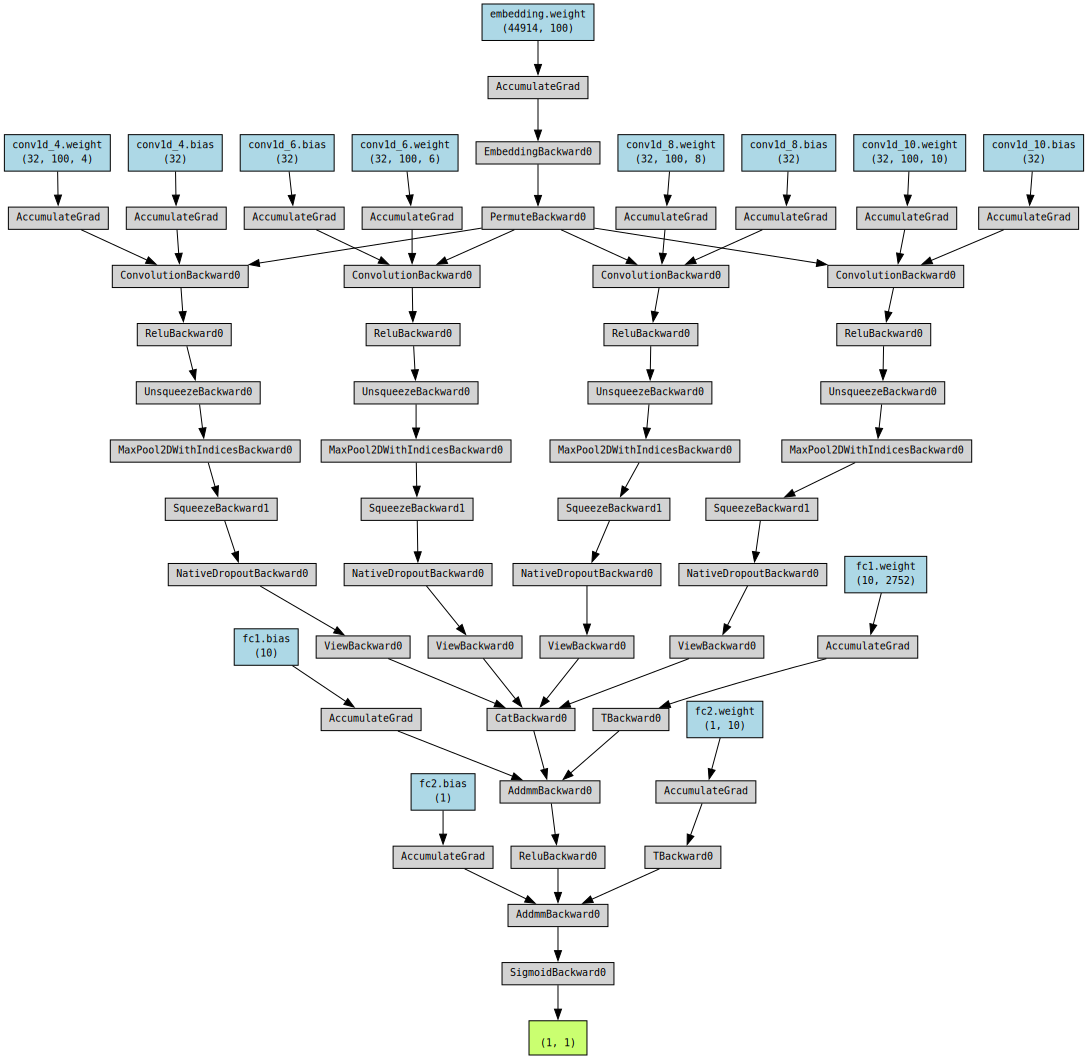

In [61]:
vocab_size = len(vocab)  # Use the actual vocabulary size
embed_dim = 100
num_classes = 1  # Binary classification (0 or 1)
max_len = pad_len
model = TextClassificationModel(vocab_size, embed_dim, num_classes, max_len)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
plot_model(model, input_size=(1, max_len))

In [ ]:
# Create DataLoader
torch.manual_seed(1234)

# Convert to PyTorch tensors
train_x_tensor = torch.tensor(train_x_padded, dtype=torch.long)
test_x_tensor = torch.tensor(test_x_padded, dtype=torch.long)

# Convert labels to tensors
train_y_tensor = torch.tensor(train_y, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y, dtype=torch.float32)

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
test_dataset = torch.utils.data.TensorDataset(test_x_tensor, test_y_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=False)


def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        all_preds = []
        all_labels = []
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)  # Move data to the same device
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.float())  # Squeeze output for binary cross-entropy loss
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            # Collect predictions and labels for accuracy calculation
            preds = (outputs.squeeze() > 0.5).float()  # Assuming binary classification
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
        
        # Calculate accuracy
        accuracy = accuracy_score(all_labels, all_preds)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.4f}')

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=12)


In [26]:
from torchviz import make_dot

# Evaluation steps
def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    running_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)  # Move data to the same device
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.float())
            running_loss += loss.item()
            preds = (outputs.squeeze() > 0.5).float()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, zero_division=1)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    print(f'Test Loss: {running_loss/len(test_loader):.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    

# Evaluate the model
evaluate_model(model, test_loader, criterion)

# Save the model
#torch.save(model.state_dict(), 'pos_neg.pt')


Test Loss: 0.9522
Accuracy: 0.5375
Precision: 0.5258
Recall: 0.7650
F1 Score: 0.6232
